# Generate blobs of data

## importing modules

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

## generating the data set

In [5]:
centers = [(-5, -10), (0, 5), (5, 15),  (10, -10), (-15, 5)]
# create blobs
data = make_blobs(n_samples=500, n_features=2, centers=centers, cluster_std=2.0, random_state=42)
# create np array for data points
points = data[0]

## plotting the data

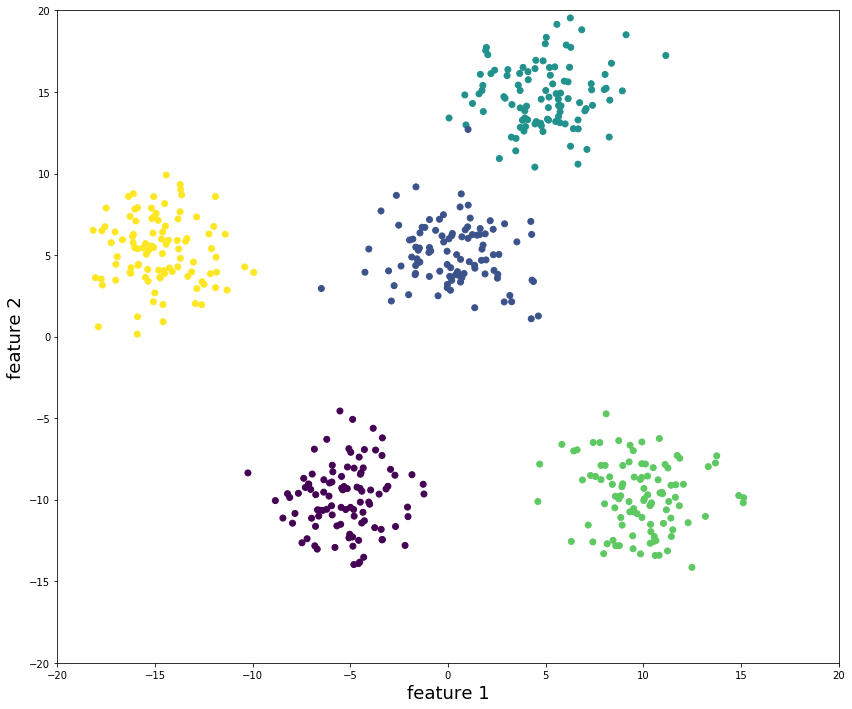

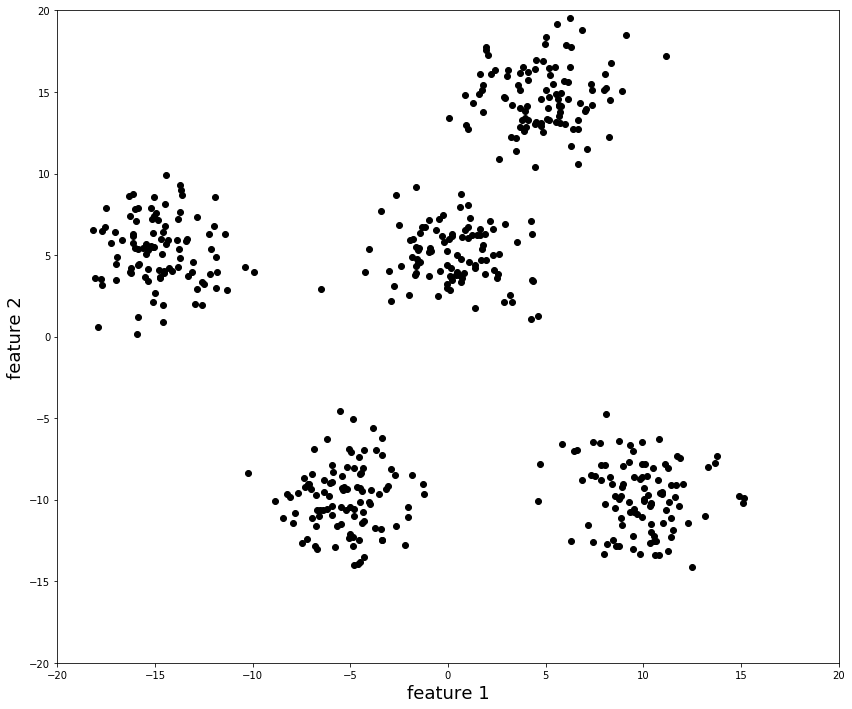

In [6]:
# create scatter plot
plt.figure(figsize=[14,12])
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel('feature 1', fontsize=18)
plt.ylabel('feature 2', fontsize=18)
plt.savefig("data_colored.png", bbox_inches='tight', overwrite=True)

plt.figure(figsize=[14,12])
plt.scatter(data[0][:,0], data[0][:,1], color='black')
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.xlabel('feature 1', fontsize=18)
plt.ylabel('feature 2', fontsize=18)
plt.savefig("data_uncolored.png", bbox_inches='tight', overwrite=True)

## saving data into ".txt" file

In [7]:
np.savetxt('K-means-Data.txt', data[0], delimiter=',')

# Next block will contain the main program - algorithm of K-means clustering

## In short, the idea is to cluster unlabeled/un-clustered data into groups/clusters. 
## A number of clusters will be equal to a k, which is integer. Firstly, we have to assign cluster centers randomly to find the best realistic solution. 
## The algorithm will be looking for clusters (clumps) and moving the center of the cluster in every iteration. For this, we will have to calculate the distances to the nearest points from the current cluster center and move it towards the closest clump. 
## In principal, we should repeat this process several (or many) times for the best solution. And in the end weigth all of the solutions - the most weighted one should be the best estimate for the cluster centers, for example.